In [53]:
import pandas as pd

In [54]:
df_booking = pd.read_csv('fact_bookings.csv')
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [55]:
df_booking.shape

(134590, 12)

In [56]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [57]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [58]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

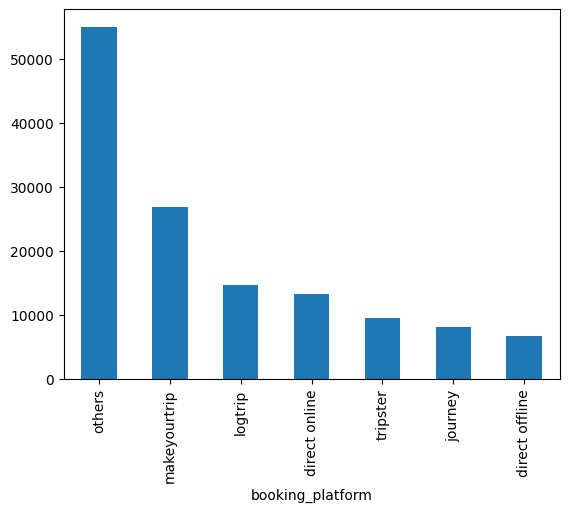

In [59]:
df_booking.booking_platform.value_counts().plot(kind = 'bar')

In [60]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [61]:
df_booking.revenue_generated.min(),  df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [62]:
df_date = pd.read_csv('dim_date.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

In [63]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [64]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [65]:
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

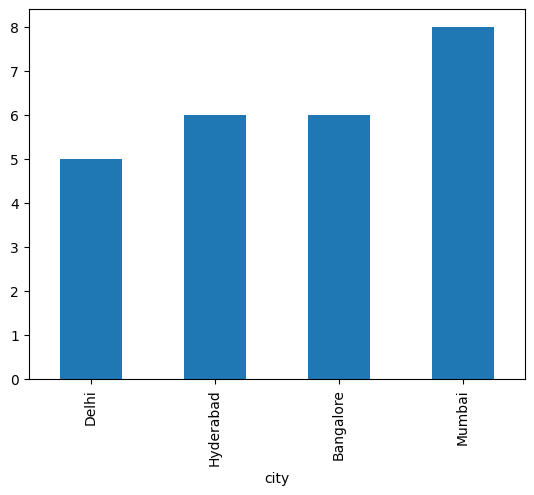

In [66]:
df_hotels.city.value_counts().sort_values().plot(kind = 'bar')

## Data Cleaning

In [67]:
df_booking[df_booking.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [68]:
df_booking.shape
# there are total 134590 rows ouy of them 9 are negative so we can delete/ ignore them

(134590, 12)

In [69]:
# record non 0 guests in same dataframe
df_booking = df_booking[df_booking.no_guests>0]

In [70]:
# now negative guests are removed from data frame ...not in original excel file
df_booking.shape

(134578, 12)

In [71]:
df_booking.revenue_generated.min(), df_booking.revenue_generated.max()
# max revenue is 28560000 for one booking which seems to be outlier

(np.int64(6500), np.int64(28560000))

In [72]:
# to remove outlier can use 3 standard deviation, z score etc
avg, std = df_booking.revenue_generated.mean(), df_booking.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [73]:
higher_limit = avg + (3 * std)
higher_limit

np.float64(294498.50173207896)

In [74]:
lower_limit = avg - (3 * std)
lower_limit
# here lower limit is in negative but revenue generated can't be negative so ignore lower limit

np.float64(-263742.4278567056)

In [75]:
# check if revenue generated is 0
df_booking[df_booking.revenue_generated<=0]
# no such value


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [76]:
df_booking[df_booking.revenue_generated>higher_limit]
#these are outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [77]:
df_booking[df_booking.revenue_generated<higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [78]:
df_booking =df_booking[df_booking.revenue_generated<higher_limit]
df_booking.shape

(134573, 12)

In [79]:
df_booking.revenue_generated.dtype

dtype('int64')

In [80]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [81]:
avg, std = df_booking.revenue_realized.mean(), df_booking.revenue_realized.std()
avg, std

(np.float64(12695.983585117372), np.float64(6927.791692242814))

In [82]:
higher_limit = avg + (3 * std)
higher_limit
# it gives higher limit as 33479 but in actual data it is 45220. in real world one night cost can be 45k, so we can't directly say it is outlier 

np.float64(33479.358661845814)

In [83]:
df_booking[df_booking.revenue_realized>higher_limit]
# when check values greater than higher value there are 1299 rows and values varies from 30-45Kand room_category is RT4 for all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [84]:
#check room type of RT4 is Presidential which is very expensive type room
df_rooms


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [85]:
df_booking[df_booking.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [86]:
# now get higher limit
23439 + 9048 * 3
#higher limit for RT4 is 50k which means there is no outlier

50583

In [87]:
df_booking.isnull().sum()
# ratings columns have 77897 nulls. but we don't need to fill with mean, median, mode because it is normal most people live in hotel but not neccessary give ratings

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

## Data Transformation

In [88]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [89]:
df_agg_bookings['occupancy_rate'] =  ((df_agg_bookings.successful_bookings/df_agg_bookings.capacity)*100).round(2)
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [90]:
# second method
df_agg_bookings['occ_rate']=df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate
0,16559,1-May-22,RT1,25,30.0,83.33,0.833333
1,19562,1-May-22,RT1,28,30.0,93.33,0.933333
2,19563,1-May-22,RT1,23,30.0,76.67,0.766667
3,17558,1-May-22,RT1,30,19.0,157.89,1.578947
4,16558,1-May-22,RT1,18,19.0,94.74,0.947368


In [91]:
df_agg_bookings['occ_rate']=df_agg_bookings['occ_rate'].apply(lambda x: round(x*100,2))
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate
0,16559,1-May-22,RT1,25,30.0,83.33,83.33
1,19562,1-May-22,RT1,28,30.0,93.33,93.33
2,19563,1-May-22,RT1,23,30.0,76.67,76.67
3,17558,1-May-22,RT1,30,19.0,157.89,157.89


## what is the average occupancy rate in each room categories?

In [92]:
# this gives you result in python but u can't convert that into excel or csv
df_agg_bookings.groupby('room_category')['occupancy_rate'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occupancy_rate, dtype: float64

In [93]:
df_agg_bookings.groupby('room_category').agg({'occupancy_rate': 'mean'}).round(2).reset_index()


,room_category,occupancy_rate
0,RT1,58.22
1,RT2,58.04
2,RT3,58.03
3,RT4,59.30


In [94]:
## merge df_rooms with above table (final_df) so that instead of showing RT1  show standard, Elite..so on
# but column name in both table has different so first rename it

In [95]:
fc = df_agg_bookings.groupby('room_category').agg({'occupancy_rate': 'mean'}).round(2).reset_index().rename(columns={'room_category': 'room_id'})
fc

,room_id,occupancy_rate
0,RT1,58.22
1,RT2,58.04
2,RT3,58.03
3,RT4,59.30


In [96]:
avg_occ_rate = pd.merge(df_rooms,fc , on = 'room_id')
avg_occ_rate

,room_id,room_class,occupancy_rate
0,RT1,Standard,58.22
1,RT2,Elite,58.04
2,RT3,Premium,58.03
3,RT4,Presidential,59.30


# second method

In [111]:
# instead of rename column name do it in merge function
df = pd.merge(df_agg_bookings, df_rooms, left_on ='room_category', right_on = 'room_id')
df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate,room_id,room_class
9195,16563,31-Jul-22,RT4,13,18.0,72.22,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,75.00,RT4,Presidential


In [98]:
# above table has room_category & room_id which has same data so drop one column
df.drop('room_id', axis=1, inplace = True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,94.74,Standard


In [114]:
df.groupby('room_class')['occ_rate'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_rate, dtype: float64

## Print average occupancy rate per city

In [ ]:
df_hotels.head(2)

In [ ]:
df = pd.merge(df_hotels, df, on = 'property_id')
df.head(2)

In [ ]:
df.groupby('city')['occupancy rate'].mean()

## when was it is better? week day or weekend?

<Axes: >

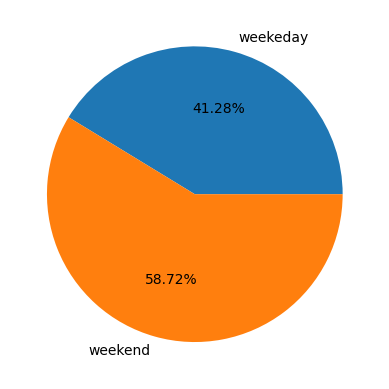

In [115]:
df_merge_date = pd.merge(df_date, df, left_on = 'date', right_on='check_in_date')
df_merge_date.drop('date', axis=1, inplace = True)
df_merge_date.groupby('day_type')['occupancy_rate'] \
    .mean().round(2) \
    .plot(kind='pie', autopct='%1.2f%%', ylabel='')


In [ ]:
df.head(2)

In [ ]:
df_date.head(2)

In [109]:
df_merge_date = pd.merge(df_date, df, left_on = 'date', right_on='check_in_date')
df_merge_date.head(2)

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate,room_class
0,10-May-22,May 22,W 20,weekeday,19563,10-May-22,RT3,15,29.0,51.72,51.72,Premium
1,10-May-22,May 22,W 20,weekeday,18560,10-May-22,RT1,19,30.0,63.33,63.33,Standard


In [103]:
df_merge_date.drop('date', axis=1, inplace = True)


In [ ]:
df_merge_date.head(2)

In [110]:
df_merge_date.groupby('day_type')['occupancy_rate'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occupancy_rate, dtype: float64

## In the month of june, what is the occupancy rate  for different cities

In [104]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [107]:
df_june_22= df_merge_date[df_merge_date['mmm yy']== 'Jun 22']
df_june_22.head()

,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_rate,room_class
2200,Jun 22,W 24,weekeday,16559,10-Jun-22,RT1,20,30.0,66.67,66.67,Standard
2201,Jun 22,W 24,weekeday,19562,10-Jun-22,RT1,19,30.0,63.33,63.33,Standard
2202,Jun 22,W 24,weekeday,19563,10-Jun-22,RT1,17,30.0,56.67,56.67,Standard
2203,Jun 22,W 24,weekeday,17558,10-Jun-22,RT1,9,19.0,47.37,47.37,Standard
2204,Jun 22,W 24,weekeday,16558,10-Jun-22,RT1,11,19.0,57.89,57.89,Standard


In [108]:
df_june_22.groupby('city')['occupancy_rate'].mean().round(2).sort_values(ascending = False)

KeyError: 'city'

In [ ]:
df_august = pd.read_csv('new_data_august.csv')
df_august

In [ ]:
# concate august data to previous df data. for that we need to first check no. of columns in both table should be same. other wise it will show nan

In [ ]:
df.columns

In [ ]:
df_august.columns

In [ ]:
df.shape

In [ ]:
df_august.shape

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis =0)
latest_df.tail()

In [ ]:
latest_df.shape

## Print Revenue realized per city

In [ ]:
df_booking.head()

In [ ]:
df_hotels.head()

In [ ]:
revenue_realized_city = pd.merge(df_booking,df_hotels, on = 'property_id' )
revenue_realized_city.head()

In [ ]:
revenue_realized_city.groupby('city')['revenue_realized'].sum()

## Print month by month revenue

In [ ]:
df_booking.head()

In [ ]:
df_date.head()

In [ ]:
month_df = pd.merge(df_booking, df_date, left_on = 'check_in_date', right_on = 'date')
month_df.tail()
# get no value because date format of date column is different in both table

In [ ]:
df_booking.info()

In [ ]:
df_date.info()

In [ ]:
# date column is in object type convert it into date data type
df_date['date']= pd.to_datetime(df_date['date'])
df_date.head()

In [ ]:
df_date.info()

In [ ]:
df_booking['check_in_date'] = pd.to_datetime(df_booking['check_in_date'])
df_booking.head(12)

In [ ]:
# in above query it can;t change to date type because some dates are mm/dd/yyyy and some are dd/mm/yyyy
df_booking['check_in_date'] = pd.to_datetimedf_booking['check_in_date'],dayfirst=True, errors='coerce')
df_booking.head()

In [ ]:
df_booking_all = pd.merge(df_booking, df_date, left_on = 'check_in_date', right_on = 'date')
df_booking_all.head()

In [ ]:
df_booking_all.groupby('mmm yy')['revenue_realized'].sum()

## print revenue realized by hotel

In [ ]:
hotel_revenue = pd.merge(df_booking,df_hotels,on= 'property_id')
hotel_revenue.groupby('property_name')['revenue_realized'].sum()

## Print average rating per city

In [ ]:
df_hotels.head(2)

In [ ]:
df_booking.head(2)

In [ ]:
avg_rating = pd.merge(df_hotels, df_booking, on ='property_id')
avg_rating.groupby('city').agg({'ratings_given': 'mean'}).reset_index().round(2)

## print a pie chart of revenue realized per booking platform

In [ ]:
df_booking.groupby('booking_platform')['revenue_realized'].plot(kind='pie', autopct= '%1.1f%%', ylabel='')